In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Assign frequencies and amplitudes based on name and surname
name = "Nika"
surname = "Golestani"

frequencies = [ord(name[i]) for i in range(3)]  # ASCII values for the first three letters of name
amplitudes = [ord(surname[i]) for i in range(3)]  # ASCII values for the first three letters of surname
print(frequencies, amplitudes)


[78, 105, 107] [71, 111, 108]


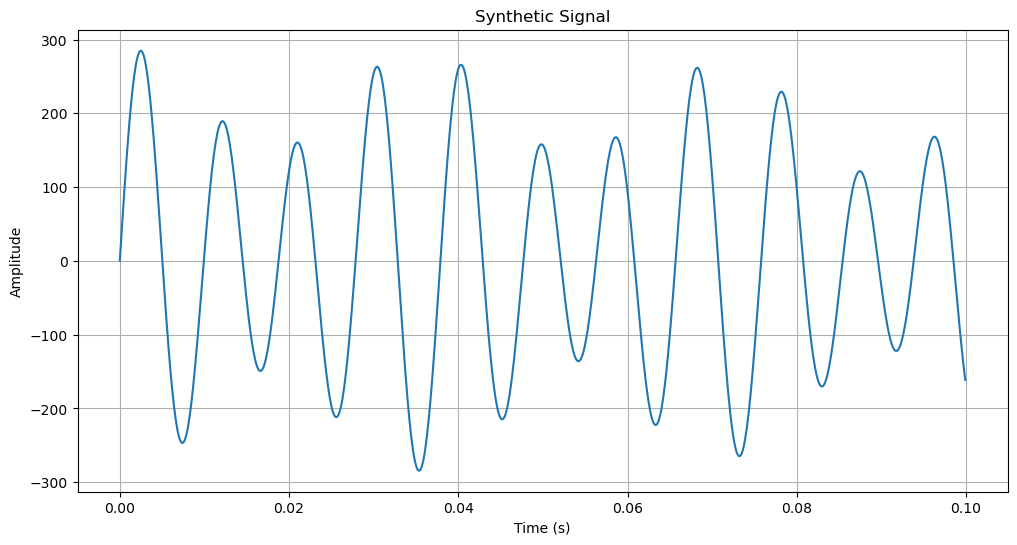

In [ ]:
# Parameters for the signal
ds = 1/10000  # Sampling interval
fs = 10000  # Sampling frequency
duration = 10  # Duration in seconds
t = np.arange(0, duration, ds)  # Time vector

# Generate the synthetic signal
signal = sum(amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t) for i in range(3))

# Plot the synthetic signal
plt.figure(figsize=(12, 6))
plt.plot(t[:1000], signal[:1000])  # Plotting only the first 1000 samples for clarity
plt.title("Synthetic Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()



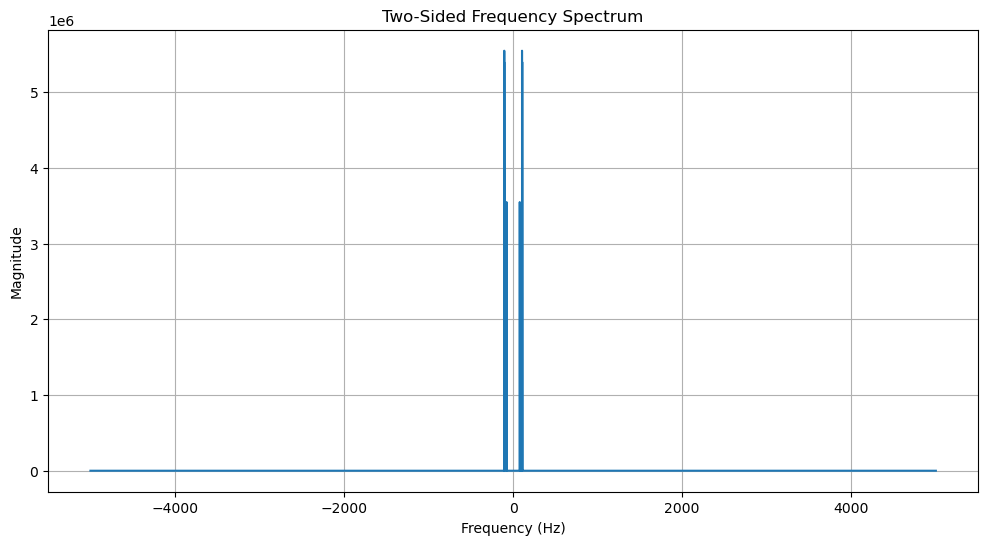

In [42]:
# Analyze the two-sided frequency spectrum of the signal using FFT
fft_values = np.fft.fft(signal)
fft_freqs = np.fft.fftfreq(len(fft_values), d=ds)

plt.figure(figsize=(12, 6))
plt.plot(np.fft.fftshift(fft_freqs), np.fft.fftshift(np.abs(fft_values)))
plt.title("Two-Sided Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()



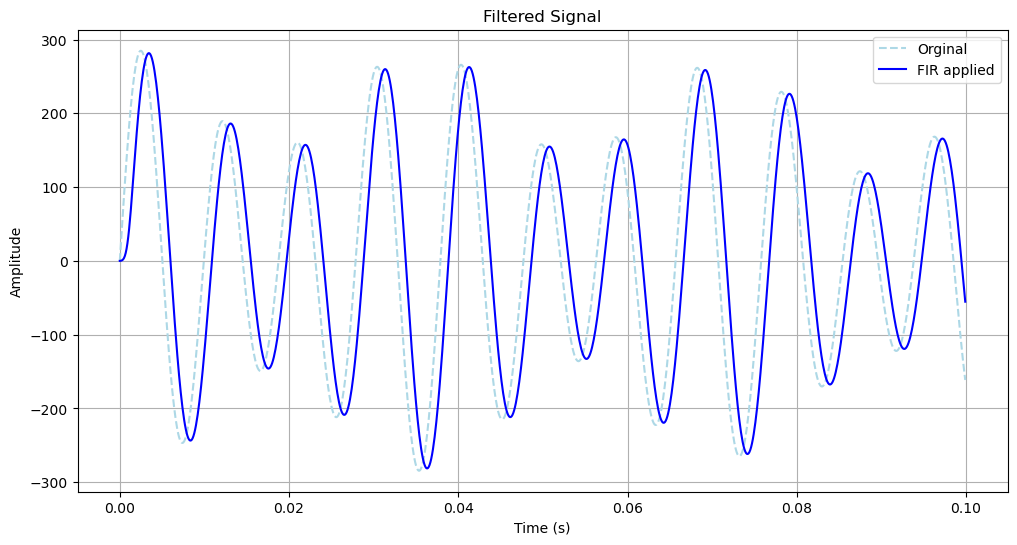

In [82]:
# Design an ideal FIR filter (Bandpass filter)
cutoff_low = frequencies[0] - 10  # 10 Hz below the first frequency
cutoff_high = frequencies[0] + 10  # 10 Hz above the first frequency
num_taps = 20  

# Design the FIR filter using firwin
bandpass_filter = firwin(num_taps, [cutoff_low, cutoff_high], fs=fs, pass_zero=False)

# Apply zero padding to the signal
padding = num_taps // 2  # Number of zeros to add on both sides
padded_signal = np.pad(signal, (padding, padding), mode='constant')

# Apply the filter
filtered_signal_padded = lfilter(bandpass_filter, 1.0, padded_signal)

# Remove padding
filtered_signal = filtered_signal_padded[padding:-padding]


# Plot the filtered signal
plt.figure(figsize=(12, 6))
plt.plot(t[:1000], signal[:1000],linestyle="--",color="lightblue",label="Orginal") 
plt.plot(t[:1000], filtered_signal[:1000],color="blue",label="FIR applied")  # Plotting the filtered signal
plt.title("Filtered Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend() 
plt.grid()
plt.show()

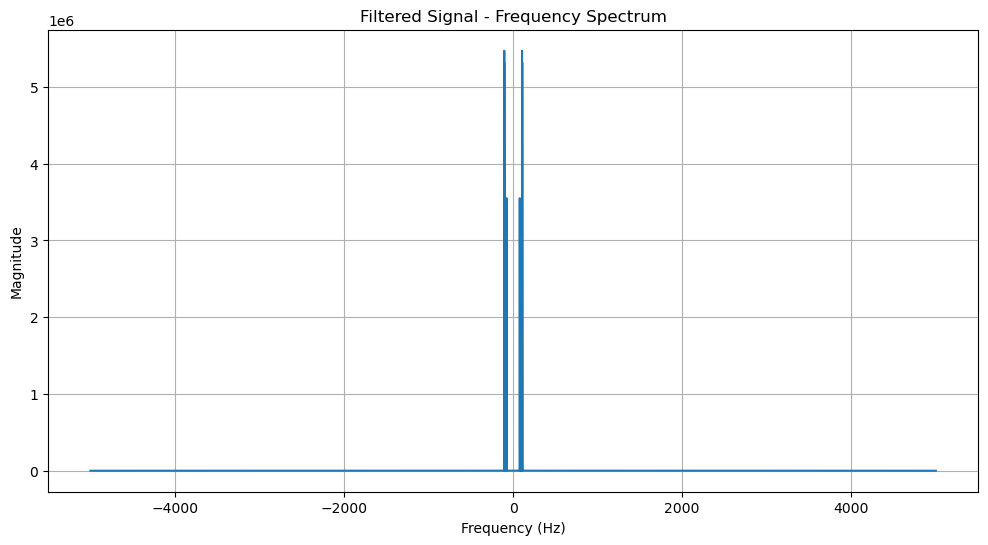

In [79]:
# Reanalyze the filtered signal using FFT
filtered_fft_values = np.fft.fft(filtered_signal)

plt.figure(figsize=(12, 6))
plt.plot(np.fft.fftshift(fft_freqs), np.fft.fftshift(np.abs(filtered_fft_values)))
plt.title("Filtered Signal - Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()